### LangGraph

#### Config the model

In [5]:
from langchain_google_genai import ChatGoogleGenerativeAI

model= ChatGoogleGenerativeAI(model="gemini-1.5-flash")
output= model.invoke("Hi")
print(output.content)

Hi there! How can I help you today?


#### Config the Embedding Model

In [39]:
from langchain_huggingface import HuggingFaceEmbeddings

embeddings= HuggingFaceEmbeddings(model_name="BAAI/bge-small-en")

In [40]:
embeddings

HuggingFaceEmbeddings(model_name='BAAI/bge-small-en', cache_folder=None, model_kwargs={}, encode_kwargs={}, query_encode_kwargs={}, multi_process=False, show_progress=False)

In [41]:
embeddings.embed_query("Hi")

[-0.07908844202756882,
 -0.04442884773015976,
 0.05409764125943184,
 -0.044667042791843414,
 -0.004612544551491737,
 0.02221708931028843,
 0.059072185307741165,
 0.04883622005581856,
 0.028120674192905426,
 0.0176496971398592,
 0.0028322997968643904,
 -0.08215256780385971,
 0.034488774836063385,
 0.015403807163238525,
 0.028747456148266792,
 -0.007119529414921999,
 0.029838014394044876,
 -0.018075022846460342,
 -0.09786265343427658,
 0.021732240915298462,
 0.019262226298451424,
 -0.01266544871032238,
 -0.043377310037612915,
 -0.032973047345876694,
 0.008817197754979134,
 0.008439965546131134,
 -0.041041988879442215,
 -0.01432439312338829,
 -0.024374419823288918,
 -0.07668082416057587,
 -0.035451490432024,
 0.005375921260565519,
 0.04354889690876007,
 0.006629592273384333,
 0.03401279076933861,
 -0.025910746306180954,
 0.0015285558765754104,
 0.00927803386002779,
 -0.04985249787569046,
 0.01580633781850338,
 0.04987366124987602,
 -0.029326140880584717,
 -0.02101047709584236,
 -0.0477381

In [42]:
len(embeddings.embed_query("Hi"))

384

#### Lets take a data embed it and store in VDB (Vector Database)

In [37]:
from langchain_community.document_loaders import TextLoader, DirectoryLoader
from langchain_community.vectorstores import Chroma
from langchain_text_splitters import RecursiveCharacterTextSplitter

In [17]:
loader= DirectoryLoader("../data2", glob="./*.txt", loader_cls=TextLoader)

In [20]:
docs= loader.load()

In [21]:
docs

[Document(metadata={'source': '..\\data2\\usa.txt'}, page_content="🇺🇸 Overview of the U.S. Economy\nThe United States of America possesses the largest economy in the world in terms of nominal GDP, making it the most powerful economic force globally. It operates under a capitalist mixed economy, where the private sector dominates, but the government plays a significant regulatory and fiscal role. With a population of over 335 million people and a high level of technological advancement, the U.S. economy thrives on a foundation of consumer spending, innovation, global trade, and financial services. It has a highly diversified structure with strong sectors in technology, healthcare, finance, real estate, defense, and agriculture.\n\nU.S. GDP – Size, Composition, and Global Share\nAs of 2024, the United States’ nominal GDP is estimated to be around $28 trillion USD, accounting for approximately 25% of the global economy. It ranks #1 in the world by nominal GDP, far ahead of China (which ra

In [118]:
len(docs)

1

In [22]:
docs[0].page_content

"🇺🇸 Overview of the U.S. Economy\nThe United States of America possesses the largest economy in the world in terms of nominal GDP, making it the most powerful economic force globally. It operates under a capitalist mixed economy, where the private sector dominates, but the government plays a significant regulatory and fiscal role. With a population of over 335 million people and a high level of technological advancement, the U.S. economy thrives on a foundation of consumer spending, innovation, global trade, and financial services. It has a highly diversified structure with strong sectors in technology, healthcare, finance, real estate, defense, and agriculture.\n\nU.S. GDP – Size, Composition, and Global Share\nAs of 2024, the United States’ nominal GDP is estimated to be around $28 trillion USD, accounting for approximately 25% of the global economy. It ranks #1 in the world by nominal GDP, far ahead of China (which ranks 2nd). The U.S. GDP per capita is also among the highest, hover

In [24]:
text_splitter= RecursiveCharacterTextSplitter(
    chunk_size=200,
    chunk_overlap=50
)

In [25]:
text_splitter

In [27]:
new_docs= text_splitter.split_documents(documents= docs)

In [28]:
new_docs

[Document(metadata={'source': '..\\data2\\usa.txt'}, page_content='🇺🇸 Overview of the U.S. Economy'),
 Document(metadata={'source': '..\\data2\\usa.txt'}, page_content='The United States of America possesses the largest economy in the world in terms of nominal GDP, making it the most powerful economic force globally. It operates under a capitalist mixed economy,'),
 Document(metadata={'source': '..\\data2\\usa.txt'}, page_content='It operates under a capitalist mixed economy, where the private sector dominates, but the government plays a significant regulatory and fiscal role. With a population of over 335 million people and a'),
 Document(metadata={'source': '..\\data2\\usa.txt'}, page_content='a population of over 335 million people and a high level of technological advancement, the U.S. economy thrives on a foundation of consumer spending, innovation, global trade, and financial services.'),
 Document(metadata={'source': '..\\data2\\usa.txt'}, page_content='innovation, global trade,

In [29]:
len(new_docs)

55

In [30]:
new_docs[0].page_content

'🇺🇸 Overview of the U.S. Economy'

In [33]:
doc_string= [doc.page_content for doc in new_docs]

In [34]:
doc_string

['🇺🇸 Overview of the U.S. Economy',
 'The United States of America possesses the largest economy in the world in terms of nominal GDP, making it the most powerful economic force globally. It operates under a capitalist mixed economy,',
 'It operates under a capitalist mixed economy, where the private sector dominates, but the government plays a significant regulatory and fiscal role. With a population of over 335 million people and a',
 'a population of over 335 million people and a high level of technological advancement, the U.S. economy thrives on a foundation of consumer spending, innovation, global trade, and financial services.',
 'innovation, global trade, and financial services. It has a highly diversified structure with strong sectors in technology, healthcare, finance, real estate, defense, and agriculture.',
 'U.S. GDP – Size, Composition, and Global Share',
 'As of 2024, the United States’ nominal GDP is estimated to be around $28 trillion USD, accounting for approximately 

In [35]:
len(doc_string)

55

In [44]:
db= Chroma.from_documents(new_docs, embeddings)

In [47]:
db.as_retriever(search_kwargs={"k": 3})

VectorStoreRetriever(tags=['Chroma', 'HuggingFaceEmbeddings'], vectorstore=<langchain_community.vectorstores.chroma.Chroma object at 0x000002BDD1335090>, search_kwargs={'k': 3})

In [49]:
retriever= db.as_retriever(search_kwargs={"k": 3})

In [155]:
retriever

VectorStoreRetriever(tags=['Chroma', 'HuggingFaceEmbeddings'], vectorstore=<langchain_community.vectorstores.chroma.Chroma object at 0x000002BDD1335090>, search_kwargs={'k': 3})

In [50]:
retriever.invoke("industrial growth of usa?")

[Document(metadata={'source': '..\\data2\\usa.txt'}, page_content='Looking forward, the U.S. economy is expected to grow at a moderate pace, powered by innovation in AI, green energy, robotics, biotech, and quantum computing. The Biden administration’s Inflation'),
 Document(metadata={'source': '..\\data2\\usa.txt'}, page_content='🇺🇸 Overview of the U.S. Economy'),
 Document(metadata={'source': '..\\data2\\usa.txt'}, page_content='The U.S. economy remains the engine of global growth, backed by unmatched innovation, financial dominance, and a strong institutional framework. Its $28 trillion GDP and influence over global')]

In [156]:
result= retriever.invoke("industrial growth of usa?")

In [157]:
result

[Document(metadata={'source': '..\\data2\\usa.txt'}, page_content='Looking forward, the U.S. economy is expected to grow at a moderate pace, powered by innovation in AI, green energy, robotics, biotech, and quantum computing. The Biden administration’s Inflation'),
 Document(metadata={'source': '..\\data2\\usa.txt'}, page_content='🇺🇸 Overview of the U.S. Economy'),
 Document(metadata={'source': '..\\data2\\usa.txt'}, page_content='The U.S. economy remains the engine of global growth, backed by unmatched innovation, financial dominance, and a strong institutional framework. Its $28 trillion GDP and influence over global')]

#### Creation of Pydantic Class

In [53]:
from pydantic import BaseModel, Field

In [54]:
class TopicSelectionParser(BaseModel):
    Topic:str = Field(description="selected topic")
    Reasoning:str = Field(description="Reasoning behind topic selection")

In [74]:
from langchain_core.output_parsers import PydanticOutputParser, StrOutputParser

In [56]:
parser= PydanticOutputParser(pydantic_object=TopicSelectionParser)

In [57]:
parser.get_format_instructions()

'The output should be formatted as a JSON instance that conforms to the JSON schema below.\n\nAs an example, for the schema {"properties": {"foo": {"title": "Foo", "description": "a list of strings", "type": "array", "items": {"type": "string"}}}, "required": ["foo"]}\nthe object {"foo": ["bar", "baz"]} is a well-formatted instance of the schema. The object {"properties": {"foo": ["bar", "baz"]}} is not well-formatted.\n\nHere is the output schema:\n```\n{"properties": {"Topic": {"description": "selected topic", "title": "Topic", "type": "string"}, "Reasoning": {"description": "Reasoning behind topic selection", "title": "Reasoning", "type": "string"}}, "required": ["Topic", "Reasoning"]}\n```'

#### This below AgentState is just for the explnation like how state works

In [61]:
AgentState={}

In [62]:
AgentState["messages"]=[]

In [63]:
AgentState

{'messages': []}

In [64]:
AgentState["messages"].append("hi how are you?")

In [65]:
AgentState

{'messages': ['hi how are you?']}

In [66]:
AgentState["messages"].append("what are you doing?")

In [67]:
AgentState

{'messages': ['hi how are you?', 'what are you doing?']}

In [68]:
AgentState["messages"].append("i hope everything fine")

In [69]:
AgentState

{'messages': ['hi how are you?',
  'what are you doing?',
  'i hope everything fine']}

In [70]:
AgentState["messages"]

['hi how are you?', 'what are you doing?', 'i hope everything fine']

In [71]:
AgentState["messages"][0]

'hi how are you?'

In [72]:
AgentState["messages"][-1]

'i hope everything fine'

#### This AgentState class you need to inside the StateGraph

In [59]:
import operator
from typing import List, Annotated, TypedDict, Sequence
from langchain_core.messages import BaseMessage

In [86]:
class AgentState(TypedDict):
    messages: Annotated[Sequence[BaseMessage], operator.add]

In [87]:
from langchain_core.prompts import PromptTemplate

In [88]:
parser= PydanticOutputParser(pydantic_object=TopicSelectionParser)
parser.get_format_instructions()

'The output should be formatted as a JSON instance that conforms to the JSON schema below.\n\nAs an example, for the schema {"properties": {"foo": {"title": "Foo", "description": "a list of strings", "type": "array", "items": {"type": "string"}}}, "required": ["foo"]}\nthe object {"foo": ["bar", "baz"]} is a well-formatted instance of the schema. The object {"properties": {"foo": ["bar", "baz"]}} is not well-formatted.\n\nHere is the output schema:\n```\n{"properties": {"Topic": {"description": "selected topic", "title": "Topic", "type": "string"}, "Reasoning": {"description": "Reasoning behind topic selection", "title": "Reasoning", "type": "string"}}, "required": ["Topic", "Reasoning"]}\n```'

In [174]:
def function_1(state:AgentState):
    question= state["messages"][-1]
    print("Question", question)

    template= """
    Your task is to classify the given user query into one of the following categories: [USA, Not Related]. 
    Only respond with the category name and nothing else.

    User query: {question}
    {format_instructions}
    """
    prompt= PromptTemplate(
        template= template,
        input_variables= ["question"],
        partial_variables= {"format_instructions": parser.get_format_instructions()}
    )

    chain= prompt | model | parser
    response= chain.invoke({"question": question})
    print("Parsed response:", response)

    return {"messages": response.Topic}

In [175]:
state= {"messages": ["what is a today weather?"]}

In [176]:
state

{'messages': ['what is a today weather?']}

In [177]:
function_1(state)

Question what is a today weather?
Parsed response: Topic='Not Related' Reasoning='The query asks for the weather, which is not specific to the USA.'


{'messages': 'Not Related'}

In [178]:
state= {"messages":["what is a GDP of usa?"]}

In [179]:
state

{'messages': ['what is a GDP of usa?']}

In [180]:
function_1(state)

Question what is a GDP of usa?
Parsed response: Topic='USA' Reasoning='The query explicitly asks for the GDP of the USA.'


{'messages': 'USA'}

In [218]:
def router(state:AgentState):
    print("-> ROUTER ->")

    last_message= state["messages"][-1]
    print("last_message:", last_message)

    if "usa" in last_message.lower():
        return "RAG Call"
    else:
        return "LLM Call"

In [219]:
len(docs)

1

In [121]:
docs[0].page_content

"🇺🇸 Overview of the U.S. Economy\nThe United States of America possesses the largest economy in the world in terms of nominal GDP, making it the most powerful economic force globally. It operates under a capitalist mixed economy, where the private sector dominates, but the government plays a significant regulatory and fiscal role. With a population of over 335 million people and a high level of technological advancement, the U.S. economy thrives on a foundation of consumer spending, innovation, global trade, and financial services. It has a highly diversified structure with strong sectors in technology, healthcare, finance, real estate, defense, and agriculture.\n\nU.S. GDP – Size, Composition, and Global Share\nAs of 2024, the United States’ nominal GDP is estimated to be around $28 trillion USD, accounting for approximately 25% of the global economy. It ranks #1 in the world by nominal GDP, far ahead of China (which ranks 2nd). The U.S. GDP per capita is also among the highest, hover

In [123]:
len(docs[0].page_content)

6949

In [134]:
[doc.page_content for doc in docs]

["🇺🇸 Overview of the U.S. Economy\nThe United States of America possesses the largest economy in the world in terms of nominal GDP, making it the most powerful economic force globally. It operates under a capitalist mixed economy, where the private sector dominates, but the government plays a significant regulatory and fiscal role. With a population of over 335 million people and a high level of technological advancement, the U.S. economy thrives on a foundation of consumer spending, innovation, global trade, and financial services. It has a highly diversified structure with strong sectors in technology, healthcare, finance, real estate, defense, and agriculture.\n\nU.S. GDP – Size, Composition, and Global Share\nAs of 2024, the United States’ nominal GDP is estimated to be around $28 trillion USD, accounting for approximately 25% of the global economy. It ranks #1 in the world by nominal GDP, far ahead of China (which ranks 2nd). The U.S. GDP per capita is also among the highest, hove

In [132]:
"\n\n".join(doc.page_content for doc in docs)

"🇺🇸 Overview of the U.S. Economy\nThe United States of America possesses the largest economy in the world in terms of nominal GDP, making it the most powerful economic force globally. It operates under a capitalist mixed economy, where the private sector dominates, but the government plays a significant regulatory and fiscal role. With a population of over 335 million people and a high level of technological advancement, the U.S. economy thrives on a foundation of consumer spending, innovation, global trade, and financial services. It has a highly diversified structure with strong sectors in technology, healthcare, finance, real estate, defense, and agriculture.\n\nU.S. GDP – Size, Composition, and Global Share\nAs of 2024, the United States’ nominal GDP is estimated to be around $28 trillion USD, accounting for approximately 25% of the global economy. It ranks #1 in the world by nominal GDP, far ahead of China (which ranks 2nd). The U.S. GDP per capita is also among the highest, hover

In [131]:
len("\n\n".join(doc.page_content for doc in docs))

6949

In [143]:
def format_docs(docs):
    return "\n\n".join(doc.page_content for doc in docs)

In [146]:
format_docs(docs)

"🇺🇸 Overview of the U.S. Economy\nThe United States of America possesses the largest economy in the world in terms of nominal GDP, making it the most powerful economic force globally. It operates under a capitalist mixed economy, where the private sector dominates, but the government plays a significant regulatory and fiscal role. With a population of over 335 million people and a high level of technological advancement, the U.S. economy thrives on a foundation of consumer spending, innovation, global trade, and financial services. It has a highly diversified structure with strong sectors in technology, healthcare, finance, real estate, defense, and agriculture.\n\nU.S. GDP – Size, Composition, and Global Share\nAs of 2024, the United States’ nominal GDP is estimated to be around $28 trillion USD, accounting for approximately 25% of the global economy. It ranks #1 in the world by nominal GDP, far ahead of China (which ranks 2nd). The U.S. GDP per capita is also among the highest, hover

In [158]:
format_docs(result)

'Looking forward, the U.S. economy is expected to grow at a moderate pace, powered by innovation in AI, green energy, robotics, biotech, and quantum computing. The Biden administration’s Inflation\n\n🇺🇸 Overview of the U.S. Economy\n\nThe U.S. economy remains the engine of global growth, backed by unmatched innovation, financial dominance, and a strong institutional framework. Its $28 trillion GDP and influence over global'

In [220]:
from langchain_core.runnables import RunnablePassthrough

In [193]:
# RAG Function
def function_2(state:AgentState):
    print("-> RAG Call ->")
    question= state["messages"][0]
    
    prompt= PromptTemplate(
        template=""" 
        You are an assistant for question-answering tasks. Use the following pieces of retrieved context to answer the question. 
        If you don't know the answer, just say that you don't know. Use three sentences maximum and keep the answer concise.\n
        Question: {question} \nContext: {context} \nAnswer:
        """,
        input_variables=["context", "question"]
    )

    rag_chain= (
        {"context": retriever | format_docs, "question": RunnablePassthrough()}
        | prompt
        | model
        | StrOutputParser()
        )

    result= rag_chain.invoke(question)
    return {"messages": [result]}

In [222]:
# LLM Function
def function_3(state:AgentState):
    print("-> LLM Function ->")

    question= state["messages"][0]

    # Normal LLM Call
    complete_query= "Answer the follow question with you knowledge of the real world. Following is the user question: " + question
    response= model.invoke(complete_query)
    return {"messages": response.content}

In [223]:
from langgraph.graph import StateGraph, END

In [224]:
workflow= StateGraph(AgentState)

In [225]:
workflow.add_node("Supervisor", function_1)

In [226]:
workflow.add_node("RAG", function_2)

In [227]:
workflow.add_node("LLM", function_3)

In [228]:
workflow.set_entry_point("Supervisor")

In [229]:
workflow.add_conditional_edges(
    "Supervisor",
    router,
    {
        "RAG Call": "RAG",
        "LLM Call": "LLM",
    }
)

In [231]:
workflow.add_edge("RAG", END)
workflow.add_edge("LLM", END)

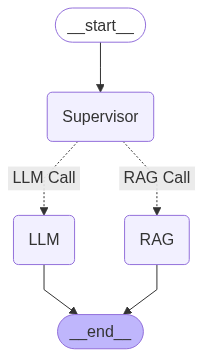

In [232]:
workflow.compile()